In [1]:
import pandas as pd
from scipy.stats import f_oneway

data = {
    'MCC': [84.4, 88.2, 84.3, 84.8],
    'Accuracy': [92.2, 94.1, 92, 92.4],
    'Precision': [93.3, 94.5, 95.6, 93.3],
    'Recall': [90.3, 93.2, 88.4, 90.6],
    'F1-Score': [91.8, 93.8, 91.9, 92]
}

df = pd.DataFrame(data, index=['M-BERT', 'IndoBERT', 'RoBERTa Indonesia', 'GPT-2 Indonesia'])
result = f_oneway(df['MCC'], df['Accuracy'], df['Precision'], df['Recall'], df['F1-Score'])

print("ANOVA F-statistic:", result.statistic)
print("ANOVA p-value:", result.pvalue)

if result.pvalue < 0.05:
    print("There are significant differences between at least two groups.")
else:
    print("No significant differences between groups.")

ANOVA F-statistic: 22.052433858204786
ANOVA p-value: 3.86898349111678e-06
There are significant differences between at least two groups.


In [2]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

pairwise_comparisons = pairwise_tukeyhsd(df.values.flatten(), df.index.repeat(df.shape[1]))
print(pairwise_comparisons.summary())

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2      meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------
GPT-2 Indonesia          IndoBERT     2.14 0.7694 -4.1882 8.4682  False
GPT-2 Indonesia            M-BERT    -0.22 0.9996 -6.5482 6.1082  False
GPT-2 Indonesia RoBERTa Indonesia    -0.18 0.9998 -6.5082 6.1482  False
       IndoBERT            M-BERT    -2.36 0.7137 -8.6882 3.9682  False
       IndoBERT RoBERTa Indonesia    -2.32 0.7241 -8.6482 4.0082  False
         M-BERT RoBERTa Indonesia     0.04    1.0 -6.2882 6.3682  False
-----------------------------------------------------------------------


<Figure size 1000x600 with 0 Axes>

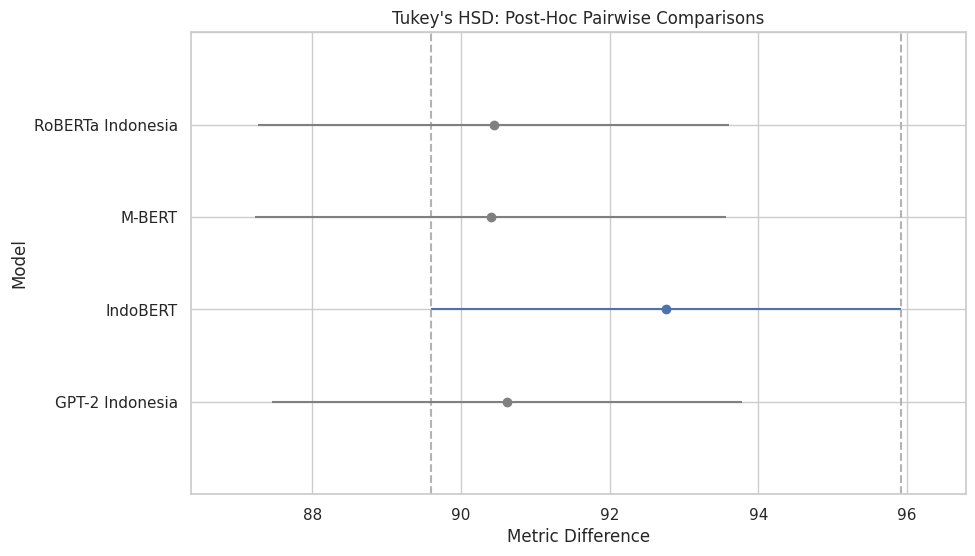

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
colors = sns.color_palette("Set2")

ax = pairwise_comparisons.plot_simultaneous(comparison_name='IndoBERT', ylabel='Model', xlabel='Metric Difference')

for i, line in enumerate(ax.lines):
    line.set_color(colors[i % len(colors)])
    line.set_marker("o")
    line.set_linestyle("--")
    line.set_linewidth(1.5)

plt.title('Tukey\'s HSD: Post-Hoc Pairwise Comparisons')
plt.show()